In [25]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE

all_files = glob.glob("roll_data/*-fly.csv")

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

len(df)

23841

In [26]:
df.loc[df["pitcher_mods"].astype(str).str.contains("SCATTERED"),"pitcher_vibes"] = 0
df.loc[df["batter_mods"].astype(str).str.contains("SCATTERED"),"batter_vibes"] = 0

for attr in ['batter_buoyancy', 'batter_divinity', 'batter_martyrdom', 'batter_moxie', 'batter_musclitude', 'batter_patheticism', 'batter_thwackability', 'batter_tragicness', 'batter_coldness', 'batter_overpowerment', 'batter_ruthlessness', 'batter_shakespearianism', 'batter_suppression', 'batter_unthwackability', 'batter_base_thirst', 'batter_continuation', 'batter_ground_friction', 'batter_indulgence', 'batter_laserlikeness', 'batter_anticapitalism', 'batter_chasiness', 'batter_omniscience', 'batter_tenaciousness', 'batter_watchfulness', 'batter_pressurization', 'batter_cinnamon']:
    df[attr] = df[attr] * df['batter_multiplier']
    df[attr+'_with_vibe'] = df[attr] * (1 + 0.2 * df['batter_vibes'])
for attr in ['pitcher_buoyancy', 'pitcher_divinity', 'pitcher_martyrdom', 'pitcher_moxie', 'pitcher_musclitude', 'pitcher_patheticism', 'pitcher_thwackability', 'pitcher_tragicness', 'pitcher_ruthlessness', 'pitcher_overpowerment', 'pitcher_unthwackability', 'pitcher_shakespearianism', 'pitcher_suppression', 'pitcher_coldness', 'pitcher_base_thirst', 'pitcher_continuation', 'pitcher_ground_friction', 'pitcher_indulgence', 'pitcher_laserlikeness', 'pitcher_anticapitalism', 'pitcher_chasiness', 'pitcher_omniscience', 'pitcher_tenaciousness', 'pitcher_watchfulness', 'pitcher_pressurization', 'pitcher_cinnamon']:
    df[attr] = df[attr] * df['pitcher_multiplier']
    df[attr+'_with_vibe'] = df[attr] * (1 + 0.2 * df['pitcher_vibes'])


/tmp/ipykernel_371012/1380338088.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[attr+'_with_vibe'] = df[attr] * (1 + 0.2 * df['pitcher_vibes'])
/tmp/ipykernel_371012/1380338088.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[attr+'_with_vibe'] = df[attr] * (1 + 0.2 * df['pitcher_vibes'])
/tmp/ipykernel_371012/1380338088.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

In [27]:
dfc = df
# for exclude_mod in ["OVERPERFORMING", "UNDERPERFORMING", "HIGH_PRESSURE", "GROWTH", "SINKING_SHIP", "TRAVELING"]:
for exclude_mod in ["FLINCH", "O_NO", "ON_FIRE", "GROWTH", "TRAVELING"]:
 dfc = dfc[~dfc["batter_mods"].astype(str).str.contains(exclude_mod)]
 dfc = dfc[~dfc["pitcher_mods"].astype(str).str.contains(exclude_mod)]
 dfc = dfc[~dfc["pitching_team_mods"].astype(str).str.contains(exclude_mod)]
 dfc = dfc[~dfc["batting_team_mods"].astype(str).str.contains(exclude_mod)]

# dfc = dfc[dfc['roll'] < 0.7]
# dfc = dfc[dfc['roll'] > 0.2]
dfc = dfc[(dfc['pitcher_multiplier'] == 1) & (dfc['batter_multiplier'] == 1)]
# dfc = dfc[(dfc['pitcher_vibes'].abs() < 0.2) & (dfc['batter_vibes'].abs() < 0.2)]
# for limit_attr in ['batter_patheticism', 'batter_thwackability', 'batter_divinity', 'batter_musclitude', 'pitcher_ruthlessness']:
#     dfc = dfc[(dfc[limit_attr] > 0.1) & (dfc[limit_attr] < 0.9)]
# dfc = dfc[dfc['batter_thwackability'] + dfc['batter_musclitude'] + dfc['batter_divinity'] > dfc['batter_patheticism']]

len(dfc)

14555

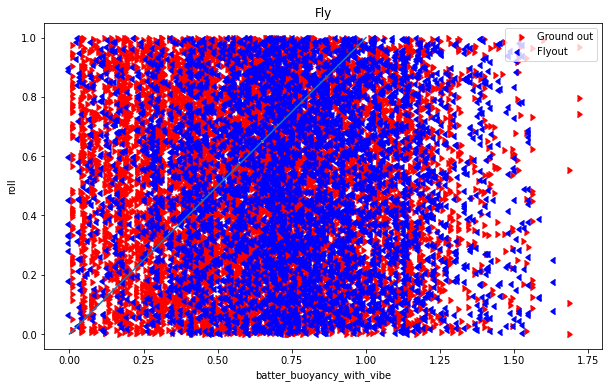

In [54]:
dfc['threshold'] = 0.05-(
    - 0.2 * dfc['batter_ground_friction_with_vibe']
    - 0.05 * dfc['ballpark_grandiosity']
    + 0.05 * dfc['defense_avg_chasiness']
    + 0.05 * dfc['pitcher_overpowerment_with_vibe']
    + 0.05 * dfc['defense_avg_omniscience']
)


x_val = "batter_buoyancy_with_vibe"
# x_val = "svc_best"
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.scatter(dfc[~dfc['passed']][x_val], dfc[~dfc['passed']]["roll"], color="red",
           label="Ground out", marker=CARETRIGHTBASE)
ax.scatter(dfc[dfc['passed']][x_val], dfc[dfc['passed']]["roll"], color="blue",
           label="Flyout", marker=CARETLEFTBASE)
ax.set_xlabel(x_val)
ax.set_ylabel('roll')
ax.set_title("Fly")
# ax.set_xlim(0.484, 0.499)

ax.plot((0, 1), (0, 1))

ax.legend()

,offset,event_type,home_score,away_score,top_of_inning,inning,pitcher_multiplier,batter_multiplier,baserunner_count,event_type,...,batter_musclitude,batter_name,pitcher_name,batter_mods,pitcher_mods,batting_team_mods,pitching_team_mods,day,game_id,play_count
7772,1.026669,Flyout,0.0,0.0,False,3,1.0,1.0,[],Flyout,...,0.485263,Siobhan Chark,Alejandro Leaf,SWIM_BLADDER,HONEY_ROASTED;WANDERER,UNDERSEA,NaN,29,7803f136-2608-4e96-88d5-2cad306b47f9,122
17991,1.015744,Flyout,0.0,5.0,True,7,1.0,1.0,[],Flyout,...,0.801767,Patel Beyonce,Fitzgerald Bl-ckburn,HONEY_ROASTED,SCATTERED,NaN,LOVE,83,acf338f4-b820-45d6-a7c3-7ee4242293db,227
8302,1.000186,Flyout,3.0,3.0,False,7,1.0,1.0,['b39b5aae-8571-4c90-887a-6a00f2a2f6fd'],Flyout,...,0.801767,Patel Beyonce,Zoey Kirchner,HONEY_ROASTED,NaN,NaN,MAINTENANCE_MODE,30,45678010-3ea2-4d14-b890-f9a36ebff7ab,242
14886,0.995880,Flyout,3.0,3.4,True,6,1.0,1.0,[],Flyout,...,0.489106,Mags Banananana,Orville Manco,WANDERER,TRIPLE_THREAT,BIRD_SEED,NaN,46,ebb88869-2a9d-4d4c-9d9a-5ffb68eef017,219
13603,0.994283,Flyout,1.0,3.0,False,4,1.0,1.0,[],Flyout,...,0.583047,Adelaide Judochop,Ruslan Greatness,NaN,FRIEND_OF_CROWS,MAINTENANCE_MODE,AFFINITY_FOR_CROWS,43,9e3f56ad-eac2-4da5-a08c-abbba4982c1f,172
13088,0.988367,Flyout,2.0,1.0,True,3,1.0,1.0,[],Flyout,...,0.187481,Igneus Delacruz,Qais Dogwalker,ALTERNATE;CHUNKY,FRIEND_OF_CROWS,BASE_INSTINCTS,LIFE_OF_PARTY;ELECTRIC,42,5d6232d3-3723-4e2a-aa83-f18299d1c070,98
17044,0.987891,Flyout,2.0,0.0,True,3,1.0,1.0,[],Flyout,...,0.630778,Gia Holbrook,Doc Anice,NaN,NaN,MAINTENANCE_MODE,AFFINITY_FOR_CROWS,81,9789292b-97c5-4de0-a16f-d559b721a607,122
7958,0.984184,Flyout,1.0,3.0,True,8,1.0,1.0,['d1a198d6-b05a-47cf-ab8e-39a6fa1ed831'],Flyout,...,0.949114,Milo Brown,Jacoby Podcast,FRIEND_OF_CROWS,NaN,LOVE,CARCINIZATION;UNHOLEY,29,a69faab8-b8a3-4368-bf7d-086d9f3cebd5,269
490,0.980149,Flyout,3.0,1.0,True,4,1.0,1.0,['4ffd2e50-bb5b-45d0-b7c4-e24d41b2ff5d'],Flyout,...,0.489106,Mags Banananana,Sandford Garner,WANDERER,NaN,BIRD_SEED,LOVE,7,327dc6d4-7db5-4d09-95c5-f2386009044c,155
17659,0.977001,Flyout,2.0,1.0,True,8,1.0,1.0,[],Flyout,...,0.703479,Mira Lemma,Doc Anice,NaN,NaN,MAINTENANCE_MODE,AFFINITY_FOR_CROWS,82,7612dac7-21d1-4234-a9fa-5a8ec1030859,304


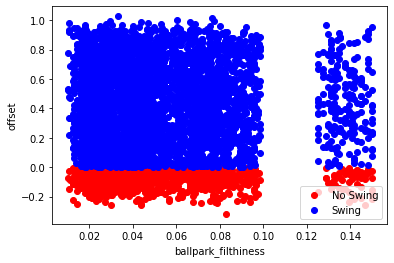

In [55]:
dfc["offset"] = dfc["roll"] - dfc["threshold"]
outliers = dfc[(dfc["passed"] & (dfc["offset"] >= 0)) | (~dfc["passed"] & (dfc["offset"] <= 0))]

fig, ax = plt.subplots(1)
x_val = "ballpark_filthiness"
ax.scatter(outliers[~outliers['passed']][x_val], outliers[~outliers['passed']]["offset"], color="red", label="No Swing")
ax.scatter(outliers[outliers['passed']][x_val], outliers[outliers['passed']]["offset"], color="blue", label="Swing")
ax.set_xlabel(x_val)
ax.set_ylabel('offset')
ax.legend()

table = outliers
table[["offset", "event_type", "home_score", "away_score", "top_of_inning", "inning",
       "pitcher_multiplier", "batter_multiplier", "baserunner_count", "event_type",
       "roll", "threshold", "batter_vibes", "pitcher_vibes",
       "pitcher_ruthlessness", "batter_musclitude",
       "batter_name", "pitcher_name", "batter_mods", "pitcher_mods",
       "batting_team_mods", "pitching_team_mods", "day",  "game_id", "play_count"]].sort_values('offset', ascending=False).iloc[:20]
# len(table)

In [41]:
df.corr()['offset'].sort_values()

pitcher_multiplier          -0.011730
ballpark_obtuseness         -0.009251
batting_team_roster_size    -0.008944
ballpark_grandiosity        -0.008849
batter_coldness_with_vibe   -0.008782
                               ...   
weather                      0.017601
roll                         1.000000
batting_team_hype                 NaN
pitching_team_hype                NaN
season                            NaN
Name: roll, Length: 144, dtype: float64

In [50]:
X = dfc[['roll', 'passed',
         'batter_buoyancy_with_vibe',
 'batter_divinity_with_vibe',
 'batter_martyrdom_with_vibe',
 'batter_moxie_with_vibe',
 'batter_musclitude_with_vibe',
 'batter_patheticism_with_vibe',
 'batter_thwackability_with_vibe',
 'batter_tragicness_with_vibe',
 'batter_pressurization_with_vibe',
 'batter_cinnamon_with_vibe',
 'pitcher_ruthlessness_with_vibe',
 'pitcher_overpowerment_with_vibe',
 'pitcher_unthwackability_with_vibe',
 'pitcher_shakespearianism_with_vibe',
 'pitcher_suppression_with_vibe',
 'pitcher_coldness_with_vibe',
 'defense_avg_anticapitalism',
 'defense_avg_chasiness',
 'defense_avg_omniscience',
 'defense_avg_tenaciousness',
 'defense_avg_watchfulness',
 'ballpark_grandiosity',
 'ballpark_fortification',
 'ballpark_obtuseness',
 'ballpark_ominousness',
 'ballpark_inconvenience',
 'ballpark_viscosity',
 'ballpark_forwardness',
 'ballpark_mysticism',
 'ballpark_elongation',
 'ballpark_filthiness',
        ]]
# X = X[X['roll'] < 0.85]

# X = dfc[['roll', 'pitcher_ruthlessness', 'ballpark_forwardness']]
# X = dfc[['roll', 'pitcher_ruthlessness']]
y = X['passed']
X = X.drop('passed', axis=1)

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, linear_model

# # trainedsvm = svm.SVC(kernel='linear').fit(X, y)
# trainedsvm = svm.LinearSVC(dual=False, max_iter=100000).fit(X, y)
# predictionsvm = trainedsvm.predict(X)
# print(confusion_matrix(y,predictionsvm))
# print(classification_report(y,predictionsvm))

sc = StandardScaler()
X2 = sc.fit_transform(X)

trainedsvm = svm.LinearSVC(intercept_scaling=100, dual=False, max_iter=100000, C=1000, class_weight='balanced').fit(X2, y)
predictionsvm = trainedsvm.predict(X2)
print(confusion_matrix(y,predictionsvm))
print(classification_report(y,predictionsvm))

[[5886 4071]
 [1875 2723]]
              precision    recall  f1-score   support

       False       0.76      0.59      0.66      9957
        True       0.40      0.59      0.48      4598

    accuracy                           0.59     14555
   macro avg       0.58      0.59      0.57     14555
weighted avg       0.65      0.59      0.61     14555



In [52]:
coef = np.true_divide(trainedsvm.coef_, sc.scale_)
coef_scaled = coef / coef[0, 0]
coef_list = coef_scaled.tolist()[0]
sorted(zip(coef_list, X.columns), key=lambda x: abs(x[0]), reverse=True)

[(126.1164541287595, 'batter_buoyancy_with_vibe'),
 (-55.452308805631944, 'ballpark_ominousness'),
 (-31.747985032797406, 'ballpark_forwardness'),
 (-30.20277090055034, 'ballpark_viscosity'),
 (27.04727825556442, 'ballpark_elongation'),
 (24.150029059071855, 'ballpark_filthiness'),
 (-21.81836698381511, 'defense_avg_tenaciousness'),
 (20.959981033656653, 'ballpark_grandiosity'),
 (-20.527198414567863, 'ballpark_obtuseness'),
 (-18.907594060273887, 'batter_cinnamon_with_vibe'),
 (-18.71872249952675, 'batter_musclitude_with_vibe'),
 (15.03029271522175, 'defense_avg_watchfulness'),
 (-14.460075377614267, 'batter_moxie_with_vibe'),
 (-12.297376886571138, 'batter_tragicness_with_vibe'),
 (11.56287897952582, 'defense_avg_omniscience'),
 (11.106502401846845, 'ballpark_inconvenience'),
 (10.430746258351476, 'batter_pressurization_with_vibe'),
 (-10.344325540813553, 'pitcher_ruthlessness_with_vibe'),
 (-9.827933790255518, 'batter_thwackability_with_vibe'),
 (-9.364110117803845, 'defense_avg_ant

In [53]:
intercept = trainedsvm.intercept_ - np.dot(coef, sc.mean_)
intercept_scaled = intercept / coef[0, 0]
intercept_scaled

array([3.1460283])

In [35]:
df.sort_values('pitcher_ruthlessness')[['pitcher_name', 'pitcher_ruthlessness', 'pitcher_multiplier']]

,pitcher_name,pitcher_ruthlessness,pitcher_multiplier
17841,Flattery McKinley,0.060292,1.00
13690,Flattery McKinley,0.060292,1.00
15553,Flattery McKinley,0.060292,1.00
9379,Flattery McKinley,0.060292,1.00
754,Flattery McKinley,0.060292,1.00
...,...,...,...
3362,PolkaDot Patterson,1.695776,1.25
7430,PolkaDot Patterson,1.695776,1.25
9772,PolkaDot Patterson,1.695776,1.25
7323,PolkaDot Patterson,1.695776,1.25


In [36]:
dfc[dfc['pitcher_ruthlessness'] > 1.6]

,Unnamed: 0,event_type,roll,passed,batter_buoyancy,batter_divinity,batter_martyrdom,batter_moxie,batter_musclitude,batter_patheticism,...,pitcher_laserlikeness_with_vibe,pitcher_anticapitalism_with_vibe,pitcher_chasiness_with_vibe,pitcher_omniscience_with_vibe,pitcher_tenaciousness_with_vibe,pitcher_watchfulness_with_vibe,pitcher_pressurization_with_vibe,pitcher_cinnamon_with_vibe,threshold,offset


In [37]:
outliers = dfc[~dfc['passed'] & (dfc['roll'] < 0.1)]
outliers

,Unnamed: 0,event_type,roll,passed,batter_buoyancy,batter_divinity,batter_martyrdom,batter_moxie,batter_musclitude,batter_patheticism,...,pitcher_laserlikeness_with_vibe,pitcher_anticapitalism_with_vibe,pitcher_chasiness_with_vibe,pitcher_omniscience_with_vibe,pitcher_tenaciousness_with_vibe,pitcher_watchfulness_with_vibe,pitcher_pressurization_with_vibe,pitcher_cinnamon_with_vibe,threshold,offset
33,33,GroundOut,0.032069,False,0.697126,0.702064,0.396697,0.412390,0.855505,0.018990,...,0.919449,1.209856,1.131776,1.338081,0.526203,0.576442,0.360522,0.662353,0.104295,-0.072225
71,71,GroundOut,0.053667,False,0.575555,0.886925,0.378346,0.344828,0.340777,0.001000,...,0.320237,0.901034,0.530683,0.688701,0.739881,0.223305,0.189958,0.138129,0.061571,-0.007904
79,79,GroundOut,0.072266,False,0.769258,0.360201,0.292669,0.818487,1.141384,0.001000,...,1.243917,0.513591,0.429246,1.235108,1.256239,0.965115,0.476948,0.473829,0.142427,-0.070161
105,105,GroundOut,0.007109,False,0.075741,0.844856,0.076972,0.700094,0.426765,0.055788,...,0.402620,0.619272,0.573670,1.114588,1.125459,0.761898,0.799922,0.409911,0.107469,-0.100360
127,127,GroundOut,0.084478,False,0.751079,1.471090,1.204729,1.467907,1.268751,0.001000,...,0.201270,0.783473,0.035969,0.035969,0.035969,0.035969,0.549244,0.209128,0.136212,-0.051734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23731,7046,GroundOut,0.035194,False,0.582000,0.564604,0.329506,0.135249,0.577155,0.119041,...,0.055729,0.120581,0.920732,0.263500,1.021387,0.086412,0.320384,0.332686,0.092267,-0.057073
23784,7099,GroundOut,0.029695,False,1.112507,1.146854,1.094173,1.309433,0.903956,0.421251,...,0.325659,0.501767,0.263444,0.640338,0.802885,0.862617,0.450885,0.092730,0.178619,-0.148924
23793,7108,GroundOut,0.093985,False,0.768765,1.020546,1.311252,0.567951,0.590879,0.406555,...,1.089017,1.485771,1.184595,0.327808,0.404688,0.588808,0.873785,1.650941,0.050593,0.043392
23799,7114,GroundOut,0.065298,False,0.130416,0.396480,0.703090,0.622335,0.119170,0.438486,...,0.344428,0.877791,0.458814,0.512768,1.049103,0.294090,0.363399,0.436730,0.148776,-0.083478


In [38]:
df[df['batter_thwackability'] + df['batter_musclitude'] + df['batter_divinity'] < df['batter_patheticism']]

,Unnamed: 0,event_type,roll,passed,batter_buoyancy,batter_divinity,batter_martyrdom,batter_moxie,batter_musclitude,batter_patheticism,...,pitcher_ground_friction_with_vibe,pitcher_indulgence_with_vibe,pitcher_laserlikeness_with_vibe,pitcher_anticapitalism_with_vibe,pitcher_chasiness_with_vibe,pitcher_omniscience_with_vibe,pitcher_tenaciousness_with_vibe,pitcher_watchfulness_with_vibe,pitcher_pressurization_with_vibe,pitcher_cinnamon_with_vibe
65,65,GroundOut,0.200167,False,0.059595,0.218959,0.794065,0.619508,0.394676,0.854069,...,0.509145,0.323088,0.568261,0.650443,0.915191,1.139005,1.014780,1.036039,0.689065,0.582199
1746,1746,GroundOut,0.253689,False,0.059715,0.219400,0.795665,0.620756,0.395470,0.855789,...,0.161441,0.385019,0.913348,0.937973,1.139154,0.922903,1.096116,0.698175,0.475730,0.707204
3934,3934,Flyout,0.097082,True,0.059866,0.219951,0.797664,0.622315,0.396464,0.857939,...,1.023789,1.156158,1.100877,1.268491,1.247225,0.660577,0.830816,0.872352,0.552038,1.231797
4030,4030,Flyout,0.547545,True,0.407004,0.136416,0.070000,0.637947,0.196717,0.930000,...,0.134744,0.836469,0.882098,0.966006,0.252022,0.302019,0.568773,0.752541,0.330429,0.344776
4567,4567,GroundOut,0.469666,False,0.059926,0.220172,0.798463,0.622939,0.396862,0.858799,...,0.535394,0.325540,0.194960,0.830942,0.731242,0.830279,0.964521,0.449680,0.677820,0.607106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23000,6315,GroundOut,0.883712,False,0.517663,0.169405,0.227826,0.721262,0.442868,0.926662,...,0.575668,0.865717,0.378249,0.923350,1.003015,0.581502,1.201842,0.792125,0.162430,0.438379
23211,6526,GroundOut,0.825460,False,0.407004,0.136416,0.070000,0.637947,0.196717,0.930000,...,0.142092,1.182456,0.649890,0.396862,0.895485,0.451255,0.856315,0.741445,0.484216,0.937829
23345,6660,Flyout,0.644407,True,0.517663,0.169405,0.227826,0.721262,0.442868,0.926662,...,0.002545,0.658194,0.889976,0.365841,0.523546,0.667622,0.832719,0.826653,0.108252,0.979309
23618,6933,GroundOut,0.192635,False,0.517663,0.169405,0.227826,0.721262,0.442868,0.926662,...,0.002484,0.642451,0.868689,0.357090,0.511024,0.651653,0.812802,0.806880,0.105663,0.955885


In [39]:
list(df.columns)

['Unnamed: 0',
 'event_type',
 'roll',
 'passed',
 'batter_buoyancy',
 'batter_divinity',
 'batter_martyrdom',
 'batter_moxie',
 'batter_musclitude',
 'batter_patheticism',
 'batter_thwackability',
 'batter_tragicness',
 'batter_coldness',
 'batter_overpowerment',
 'batter_ruthlessness',
 'batter_shakespearianism',
 'batter_suppression',
 'batter_unthwackability',
 'batter_base_thirst',
 'batter_continuation',
 'batter_ground_friction',
 'batter_indulgence',
 'batter_laserlikeness',
 'batter_anticapitalism',
 'batter_chasiness',
 'batter_omniscience',
 'batter_tenaciousness',
 'batter_watchfulness',
 'batter_pressurization',
 'batter_cinnamon',
 'batter_multiplier',
 'pitcher_buoyancy',
 'pitcher_divinity',
 'pitcher_martyrdom',
 'pitcher_moxie',
 'pitcher_musclitude',
 'pitcher_patheticism',
 'pitcher_thwackability',
 'pitcher_tragicness',
 'pitcher_ruthlessness',
 'pitcher_overpowerment',
 'pitcher_unthwackability',
 'pitcher_shakespearianism',
 'pitcher_suppression',
 'pitcher_coldn